In [1]:
import numpy as np
import scipy.io
import scipy
from scipy import stats
from ipynb.fs.full.utils import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'E:/FPP_files_and_codes/FPP_files/relabeled_seconds/corrected_GPT_labeling/final_labels.csv'

RelabelDataframe = pd.read_csv(file_path)

In [3]:
RelabelDataframe

,prv_label,new_label
0,NaN,NaN
1,abdomen,Body
2,airliner,Object
3,airplane,Object
4,animal,Animal
...,...,...
595,woman,Body
596,work,Unclear
597,workshop,Place
598,wristband,Object


In [4]:
RelabelDictionary = {}
for index, row in RelabelDataframe.iterrows():
    if index != 0:
        RelabelDictionary[row['prv_label']] = row['new_label']
RelabelDictionary[''] = float('nan')

In [6]:
labels_list_1 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie1_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_1.append(labels)
labels_list_2 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie2_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_2.append(labels)
labels_list_3 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie3_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_3.append(labels)
labels_list_4 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie4_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_4.append(labels)
labels_list = labels_list_1 + labels_list_2 + labels_list_3  + labels_list_4
print(len(labels_list))

3655


In [7]:
RelabeldFrames = [set() for i in range(3655)]
for i in range(3655):
    for j in labels_list[i]:
        RelabeldFrames[i].add(str(RelabelDictionary[j]))

In [8]:
RelabeldFrames

[{'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'nan'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Body', 'Object', 'Place', 'Unclear'},
 {'Body', 'Object', 'Place', 'Unclear'},
 {'Body', 'Object', 'Place', 'Unclear'},
 {'Body', 'Object', 'Place', 'Unclear'},
 {'Object', 'Place'},
 {'Object', 'Place'},
 {'Body', 'Object', 'Place', 'Unclear'},
 {'Body', 'Object', 'Place', 'Unclear'},
 {'B

In [9]:
P_AFB = []
k = 0
for i in RelabeldFrames:
    if (('Place' in i) and ('Animal' not in i) and ('Face' not in i) and ('Body' not in i)):
        P_AFB.append(k)
    k += 1
print(len(P_AFB))

566


In [10]:
PAFB = []
k = 0
for i in RelabeldFrames:
    if (('Place' in i) and( ('Animal' in i) or ('Face' in i) or ('Body' in i))):
        PAFB.append(k)
#         print(i)
    k += 1
print(len(PAFB))

1945


In [11]:
P_FB = []
k = 0
for i in RelabeldFrames:
    if (('Place' in i) and ('Face' not in i) and ('Body' not in i)):
        P_FB.append(k)
    k += 1
print(len(P_FB))

609


In [12]:
PFB = []
k = 0
for i in RelabeldFrames:
    if (('Place' in i) and(('Face' in i) or ('Body' in i))):
        PFB.append(k)
#         print(i)
    k += 1
print(len(PFB))

1902


In [13]:
delay = 5
P_AFB_Delay = (np.array(P_AFB) + delay)% 3655
PAFB_Delay = (np.array(PAFB) + delay)% 3655
PFB_Delay = (np.array(PFB) + delay)% 3655
P_FB_Delay = (np.array(P_FB) + delay)% 3655

In [20]:
mean_FPPs_activity = mean_FPPs_movie_data()

In [21]:
mean_FPPs_activity.shape

(5, 3655)

In [22]:
Mean_FPPs_P_AFB = np.mean(mean_FPPs_activity[:,P_AFB_Delay], axis=1)
Mean_FPPs_PAFB = np.mean(mean_FPPs_activity[:,PAFB_Delay], axis=1)
Mean_FPPs_PFB = np.mean(mean_FPPs_activity[:,PFB_Delay], axis=1)
Mean_FPPs_P_FB = np.mean(mean_FPPs_activity[:,P_FB_Delay], axis=1)
SEM_FPPs_P_AFB = stats.sem(mean_FPPs_activity[:,P_AFB_Delay], axis=1)
SEM_FPPs_PAFB = stats.sem(mean_FPPs_activity[:,PAFB_Delay], axis=1)
SEM_FPPs_PFB = stats.sem(mean_FPPs_activity[:,PFB_Delay], axis=1)
SEM_FPPs_P_FB = stats.sem(mean_FPPs_activity[:,P_FB_Delay], axis=1)

In [23]:
SEM_FPPs_P_AFB

array([0.00816323, 0.01075971, 0.01198196, 0.00970007, 0.00891348])

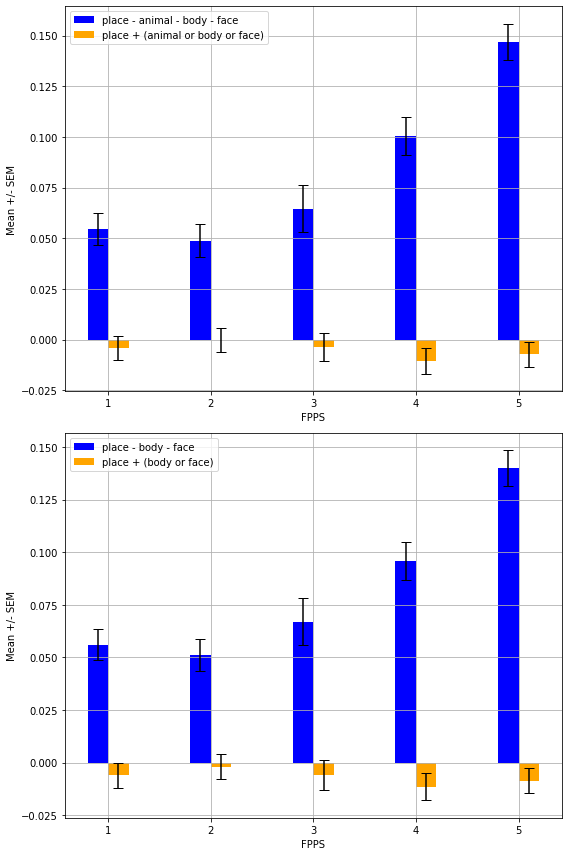

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

width = 0.2 

bars1_1 = ax1.bar(np.arange(5) - width/2, Mean_FPPs_P_AFB, width, yerr=SEM_FPPs_P_AFB, capsize=5, label='place - animal - body - face', color='blue')
bars1_2 = ax1.bar(np.arange(5) + width/2, Mean_FPPs_PAFB, width, yerr=SEM_FPPs_PAFB, capsize=5, label='place + (animal or body or face)', color='orange')

ax1.set_xticks(np.arange(5))
ax1.set_xticklabels(['1', '2', '3', '4', '5'])

ax1.set_xlabel('FPPS')
ax1.set_ylabel('Mean +/- SEM')
# ax1.set_title('comparing frames with place (considering animal as animate)')
ax1.legend()
ax1.grid()


bars2_1 = ax2.bar(np.arange(5) - width/2, Mean_FPPs_P_FB, width, yerr=SEM_FPPs_P_FB, capsize=5, label='place - body - face', color='blue')
bars2_2 = ax2.bar(np.arange(5) + width/2, Mean_FPPs_PFB, width, yerr=SEM_FPPs_PFB, capsize=5, label='place + (body or face)', color='orange')

ax2.set_xticks(np.arange(5))
ax2.set_xticklabels(['1', '2', '3', '4', '5'])

ax2.set_xlabel('FPPS')
ax2.set_ylabel('Mean +/- SEM')
# ax2.set_title('comparing frames with place(considering animal as object)')
ax2.legend()
ax2.grid()


# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots

plt.show()

# panel c

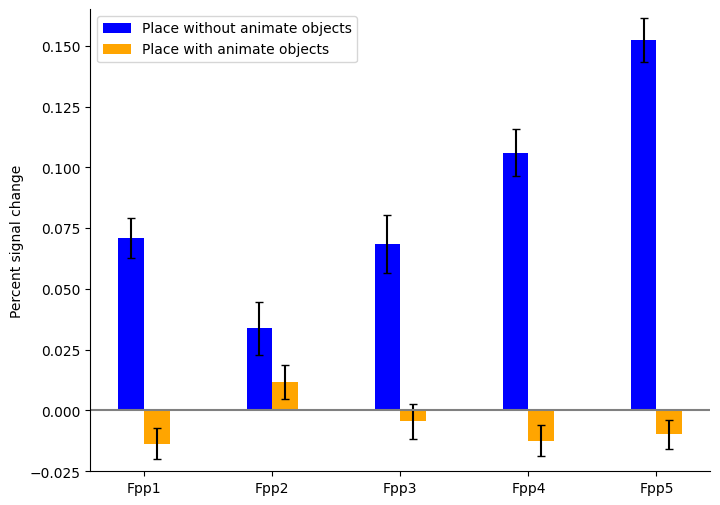

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2 

bars1_1 = ax.bar(np.arange(5) - width/2, Mean_FPPs_P_AFB, width, yerr=SEM_FPPs_P_AFB, capsize=3, label='Place without animate objects', color='blue')
bars1_2 = ax.bar(np.arange(5) + width/2, Mean_FPPs_PAFB, width, yerr=SEM_FPPs_PAFB, capsize=3, label='Place with animate objects', color='orange')

ax.set_xticks(np.arange(5))
ax.set_xticklabels(['Fpp1', 'Fpp2', 'Fpp3', 'Fpp4', 'Fpp5'])
plt.ylim(-0.025, 0.165)
plt.yticks(np.arange(-0.025, 0.16, 0.025))
# ax.set_xlabel('FPPS')
ax.set_ylabel('Percent signal change')
# ax.set_title('comparing frames with place (considering animal as animate)')
plt.axhline(0, color='gray', linestyle='-')
plt.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.box(False)